In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import seaborn as sns

In [33]:
df = pd.read_csv('../../data/raw/data_aemet/estacion_3195_data.csv')

In [34]:
df["tmed"].describe()

count     2213
unique     305
top        9,8
freq        30
Name: tmed, dtype: object

In [35]:
df["tmed"] = df["tmed"].str.replace(',', '.').astype(float)
df["tmin"] = df["tmin"].str.replace(',', '.').astype(float)
df["tmax"] = df["tmax"].str.replace(',', '.').astype(float)

In [36]:
df["fecha"] = pd.to_datetime(df["fecha"])

In [37]:
df.tail()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,horaracha,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
2228,2025-02-06,3195,"MADRID, RETIRO",MADRID,667,7.2,"0,0",1.9,07:00,12.5,...,00:30,"952,0",00,"944,8",24,54.0,76.0,23:30,37.0,14:40
2229,2025-02-07,3195,"MADRID, RETIRO",MADRID,667,4.9,"7,6",1.2,06:50,8.6,...,12:30,"944,8",00,"937,5",17,88.0,99.0,Varias,67.0,12:00
2230,2025-02-08,3195,"MADRID, RETIRO",MADRID,667,7.2,"0,0",3.0,07:50,11.4,...,Varias,"946,6",24,"938,3",00,NaN,NaN,NaN,NaN,NaN
2231,2025-02-09,3195,"MADRID, RETIRO",MADRID,667,8.2,"0,0",3.3,05:30,13.2,...,Varias,"948,0",Varias,"944,6",24,82.0,NaN,NaN,NaN,NaN
2232,2025-02-10,3195,"MADRID, RETIRO",MADRID,667,10.4,"0,0",7.4,05:00,13.5,...,12:40,"944,6",00,"939,5",19,78.0,95.0,05:00,64.0,13:40


In [38]:
df["tmed"].value_counts()

tmed
 9.8     30
 9.6     25
 11.2    25
 11.0    24
 10.4    24
         ..
-1.8      1
 31.3     1
 30.3     1
 28.3     1
 8.7      1
Name: count, Length: 305, dtype: int64

In [39]:
df = df.sort_values(by="fecha")

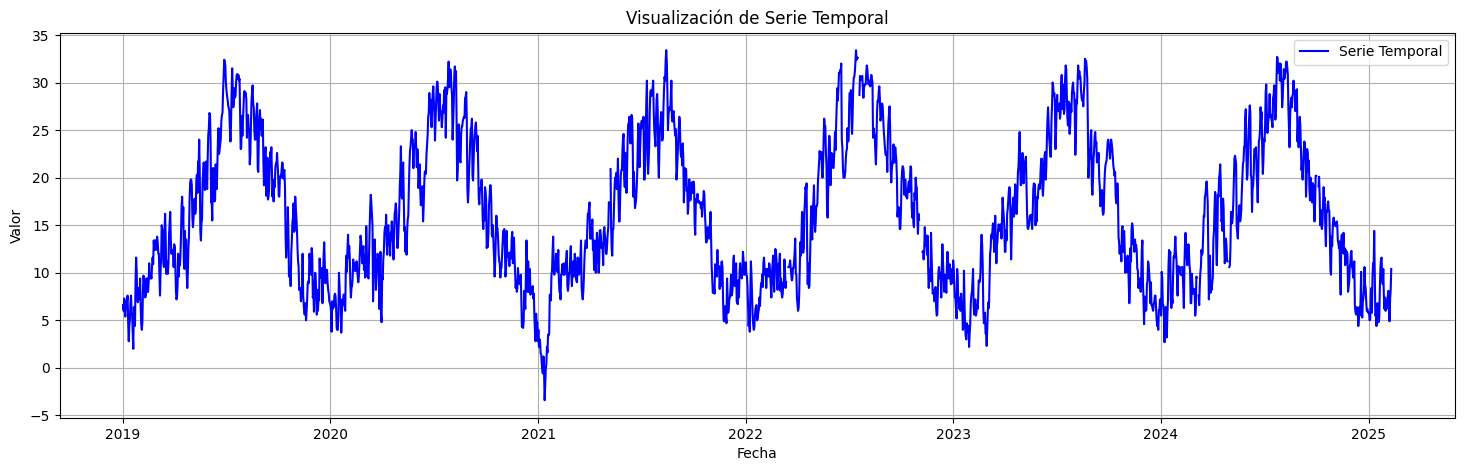

In [40]:
plt.figure(figsize=(18, 5))
plt.plot(df["fecha"], df["tmed"], label="Serie Temporal", color="b")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Visualización de Serie Temporal")
plt.legend()
plt.grid()
plt.show()

In [41]:
df["tmed"].isna().sum()

np.int64(20)

In [42]:
df['tmed'] = df['tmed'].ffill()

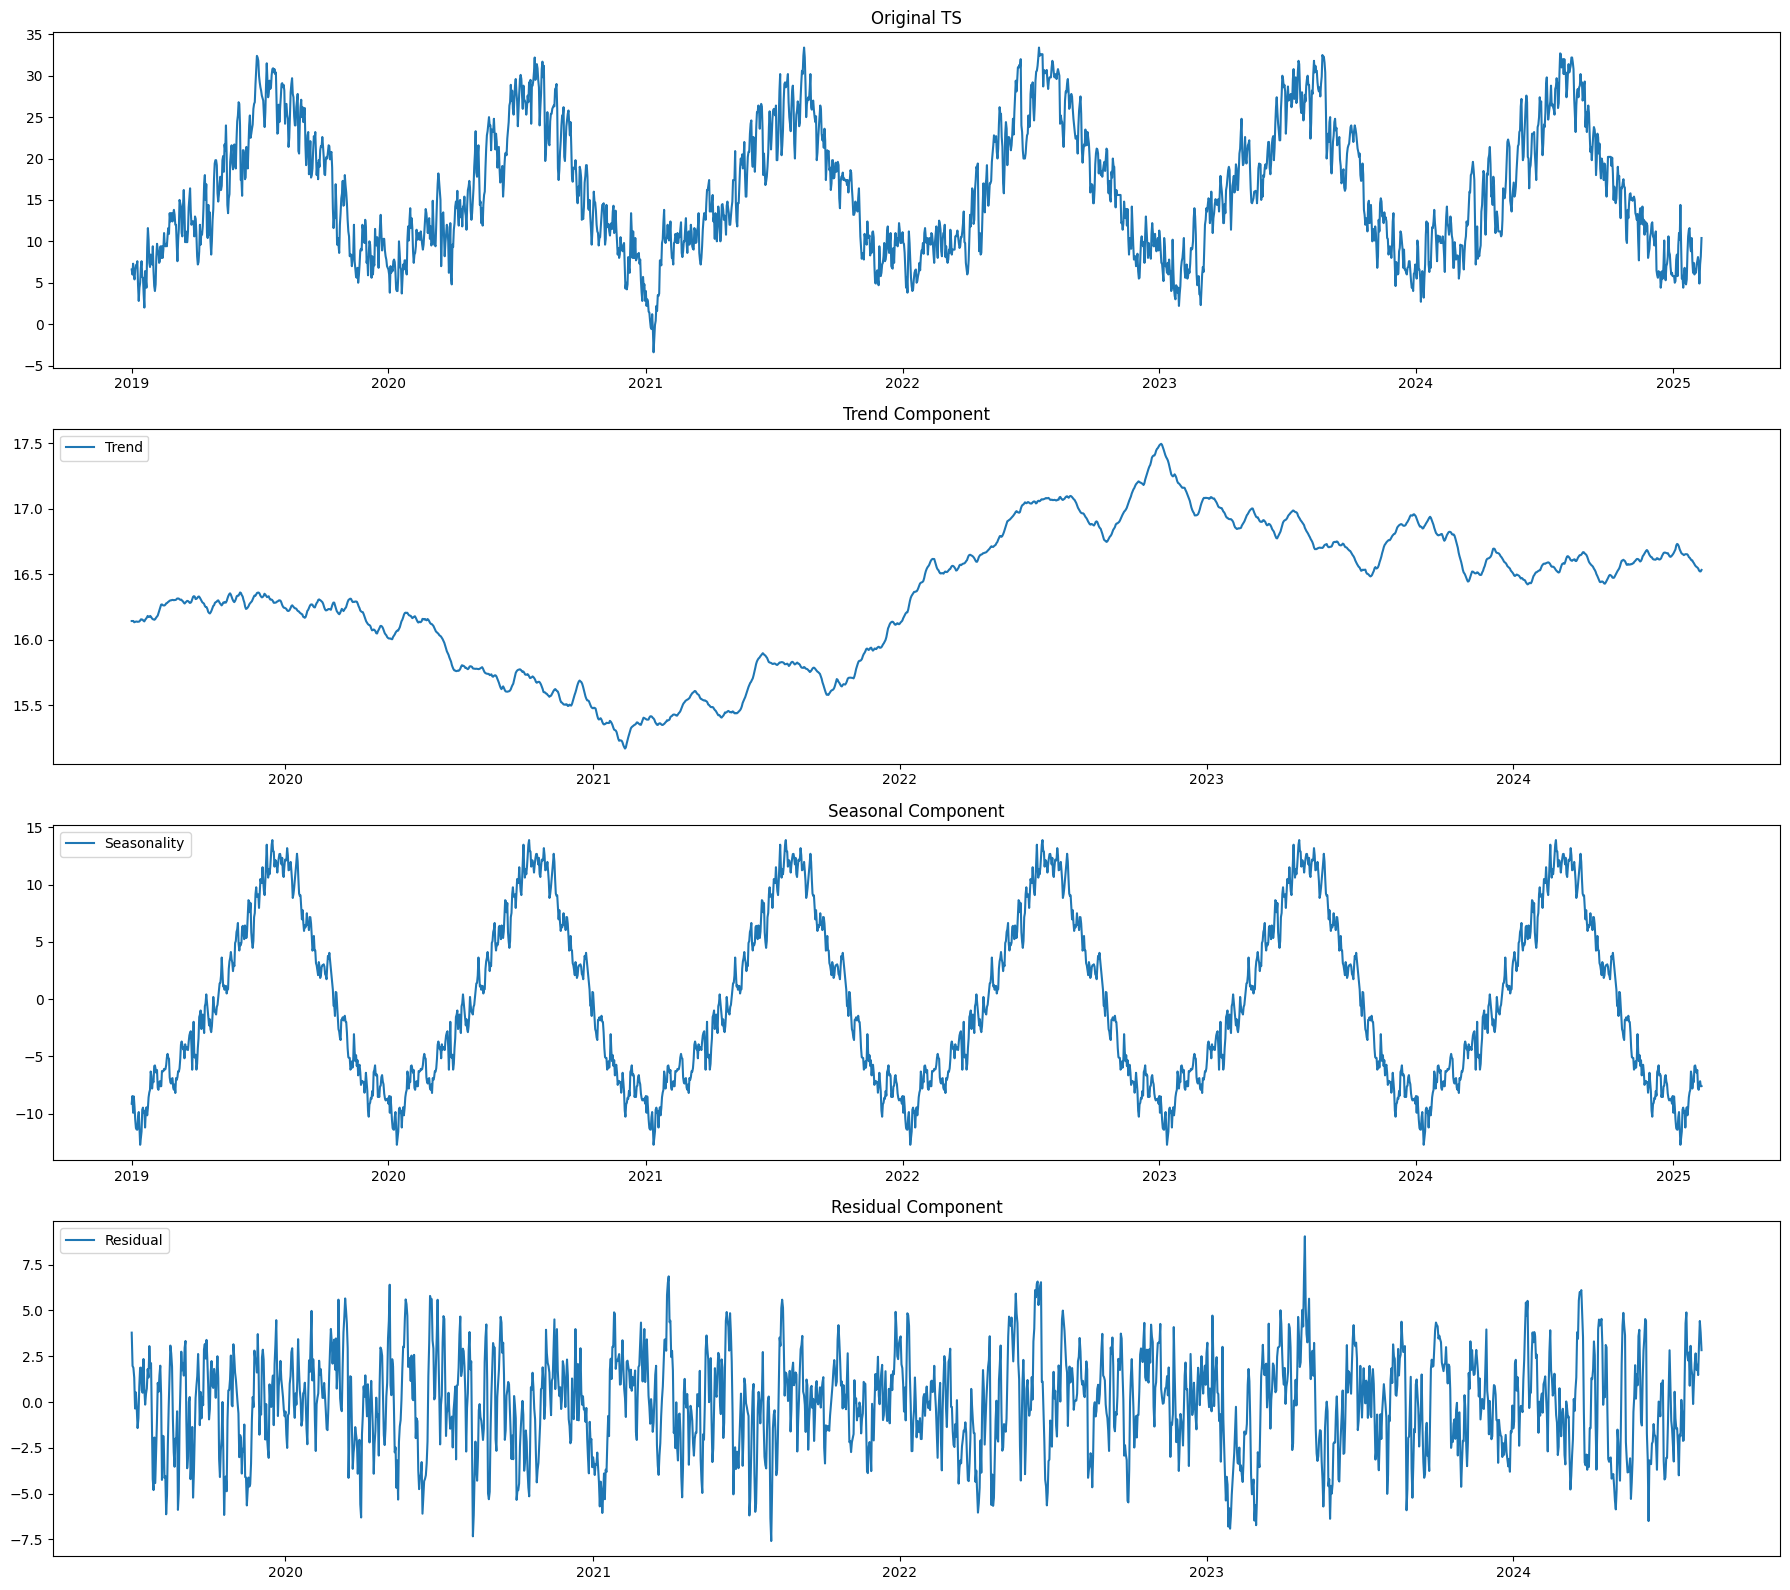

In [43]:
decomposition_air = seasonal_decompose(df['tmed'], model='additive', period=365)

plt.figure(figsize=(18, 16))

plt.subplot(4, 1, 1)
plt.plot(df["fecha"], df["tmed"])
plt.title('Original TS')

plt.subplot(4, 1, 2)
plt.plot(df["fecha"], decomposition_air.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(df["fecha"], decomposition_air.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(df["fecha"], decomposition_air.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [44]:
window = 30  # 30 days window
threshold = 3  # Threshold of 2 standard deviations

ma = df["tmed"].rolling(window=window, center=True).mean()
std = df["tmed"].rolling(window=window, center=True).std()

#Treshold min and max
threshold_min = ma - std*threshold 
threshold_max = ma + std*threshold 

#Outliers detection
df["outlier_ma"] = (np.abs(df["tmed"] - ma) > threshold * std)

In [45]:
df["outlier_ma"].value_counts()

outlier_ma
False    2233
Name: count, dtype: int64

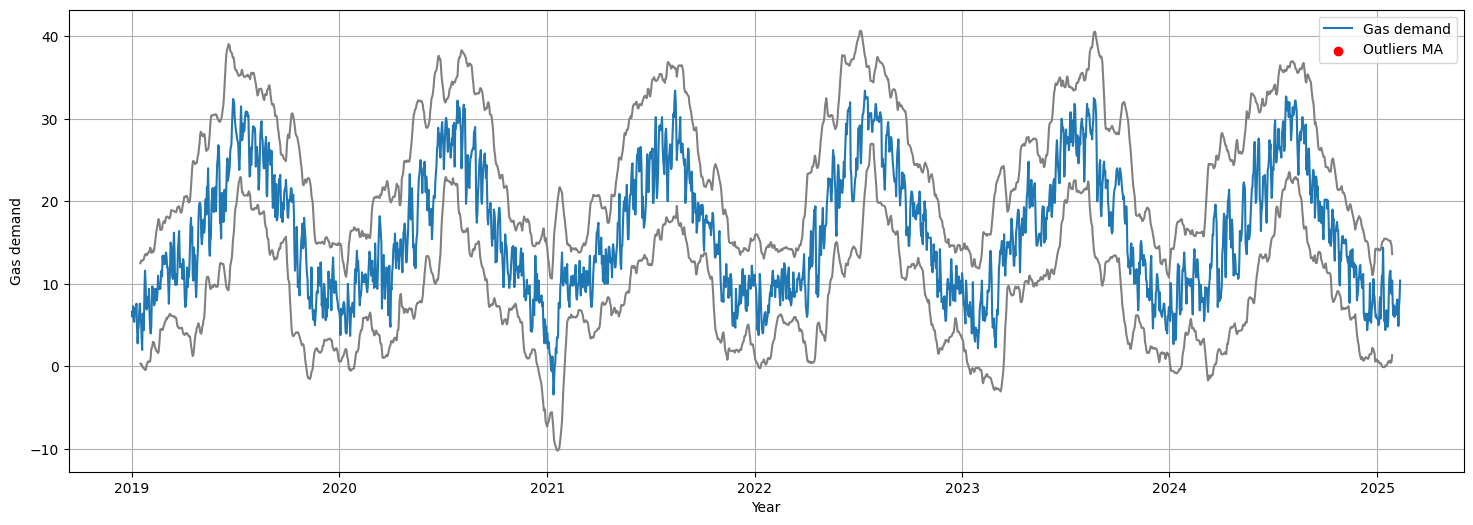

In [46]:
plt.figure(figsize=(18, 6))

plt.plot(df['fecha'], df['tmed'], label='Gas demand')
plt.plot(df['fecha'], threshold_min, color='gray')
plt.plot(df['fecha'], threshold_max, color='gray')
plt.scatter(df["fecha"][df["outlier_ma"]], df["tmed"][df["outlier_ma"]], color='red', label="Outliers MA")
plt.xlabel('Year')
plt.ylabel('Gas demand')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
df_temp_media = df[["fecha", "tmed"]].copy()

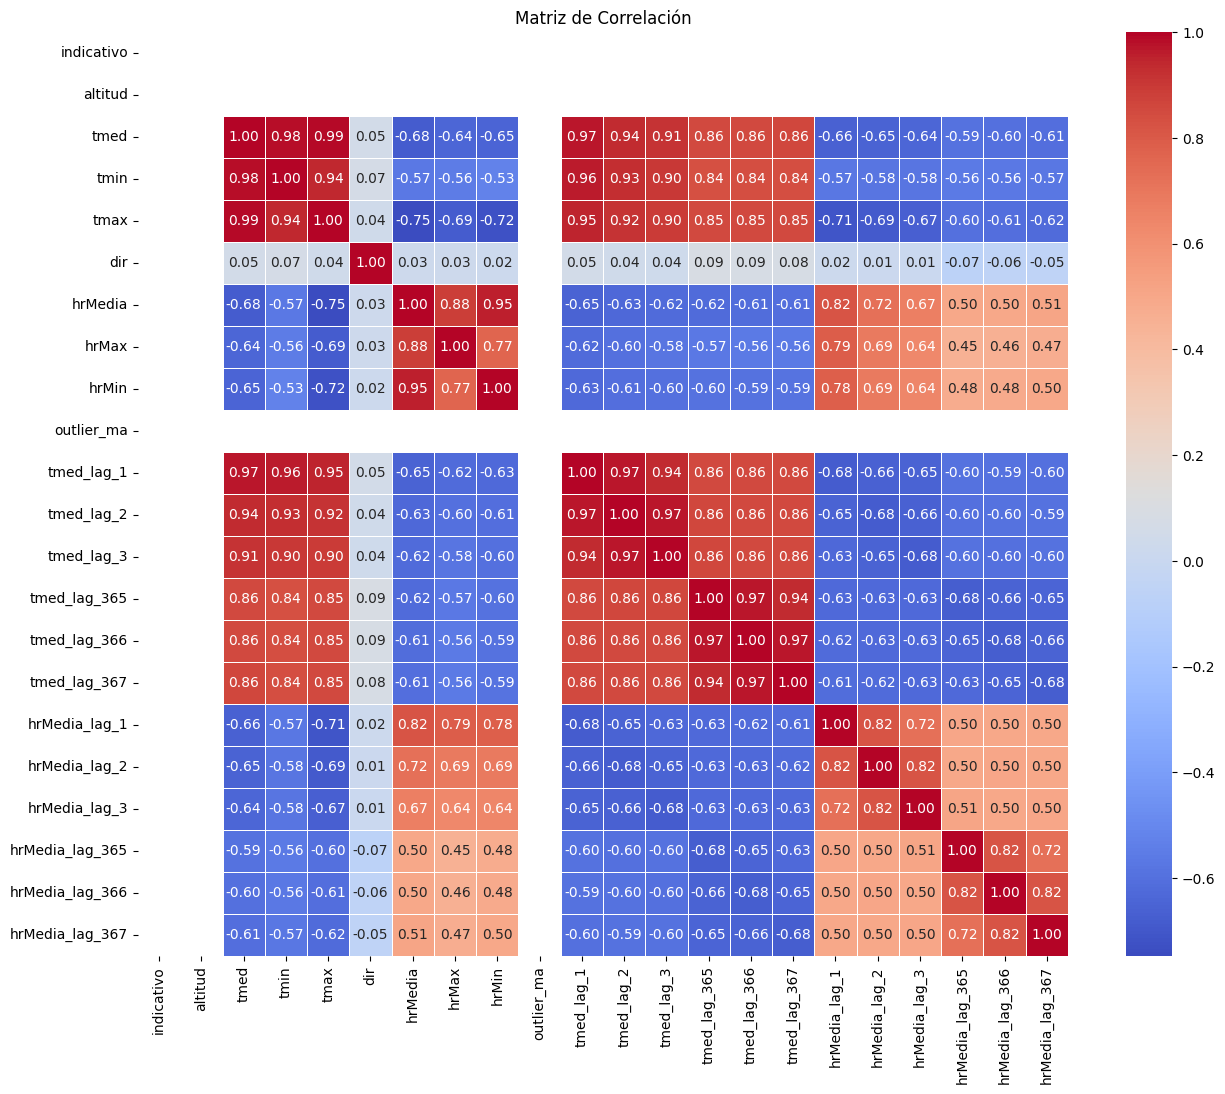

In [51]:
corr_matrix = df.corr(numeric_only=True)

# Crear el mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')

plt.show()

In [49]:
df['tmed_lag_1'] = df['tmed'].shift(1)
df['tmed_lag_2'] = df['tmed'].shift(2)
df['tmed_lag_3'] = df['tmed'].shift(3)
df['tmed_lag_365'] = df['tmed'].shift(365)
df['tmed_lag_366'] = df['tmed'].shift(366)
df['tmed_lag_367'] = df['tmed'].shift(367)
df['hrMedia_lag_1'] = df['hrMedia'].shift(1)
df['hrMedia_lag_2'] = df['hrMedia'].shift(2)
df['hrMedia_lag_3'] = df['hrMedia'].shift(3)
df['hrMedia_lag_365'] = df['hrMedia'].shift(365)
df['hrMedia_lag_366'] = df['hrMedia'].shift(366)
df['hrMedia_lag_367'] = df['hrMedia'].shift(367)

In [50]:
df.columns

Index(['fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec',
       'tmin', 'horatmin', 'tmax', 'horatmax', 'dir', 'velmedia', 'racha',
       'horaracha', 'presMax', 'horaPresMax', 'presMin', 'horaPresMin',
       'hrMedia', 'hrMax', 'horaHrMax', 'hrMin', 'horaHrMin', 'outlier_ma',
       'tmed_lag_1', 'tmed_lag_2', 'tmed_lag_3', 'tmed_lag_365',
       'tmed_lag_366', 'tmed_lag_367', 'hrMedia_lag_1', 'hrMedia_lag_2',
       'hrMedia_lag_3', 'hrMedia_lag_365', 'hrMedia_lag_366',
       'hrMedia_lag_367'],
      dtype='object')